# Django
環境

- Windows 10
- python 3.6.3
- Django 2.0.7

## 準備
### インストール

In [2]:
!pip install django

Anaconda 経由で Pythonをインストールした場合、インストール済

### プロジェクトの作成
はじめにプロジェクトを作成する。

プロジェクトとは、設定ファイルやDjango アプリケーション（後で説明します）など、開発するWebアプリケーションを定義する。

In [4]:
!django-admin startproject manager_project

In [9]:
!tree manager_project /F

フォルダー パスの一覧:  ボリューム Windows
ボリューム シリアル番号は 86A9-D4E7 です
C:\USERS\SHIHNKAWA\PRJ\DJANGO\MANAGER_PROJECT
│  manage.py
│  
└─manager_project
        settings.py
        urls.py
        wsgi.py
        __init__.py
        


## 開発
### 準備
#### アプリケーションの作成
次にアプリケーションを作成する。


In [17]:
%%cmd
cd manager_project
python manage.py startapp manager

Microsoft Windows [Version 10.0.17134.228]
(c) 2018 Microsoft Corporation. All rights reserved.

(base) C:\Users\shihnkawa\prj\Django>cd manager_project

(base) C:\Users\shihnkawa\prj\Django\manager_project>python manage.py startapp manager

(base) C:\Users\shihnkawa\prj\Django\manager_project>

In [19]:
!tree manager_project /F

フォルダー パスの一覧:  ボリューム Windows
ボリューム シリアル番号は 86A9-D4E7 です
C:\USERS\SHIHNKAWA\PRJ\DJANGO\MANAGER_PROJECT
│  manage.py
│  
├─manager
│  │  admin.py
│  │  apps.py
│  │  models.py
│  │  tests.py
│  │  views.py
│  │  __init__.py
│  │  
│  └─migrations
│          __init__.py
│          
└─manager_project
    │  settings.py
    │  urls.py
    │  wsgi.py
    │  __init__.py
    │  
    └─__pycache__
            settings.cpython-36.pyc
            __init__.cpython-36.pyc
            


### モデルの作成
#### モデルクラスの作成
Django には Python コードでデータベースのレイアウトを記述した オブジェクトリレーショナルマッパー (object-relational mapper) が付属している。

- modelはデータベースに格納されているデータを扱う。
- Djangoではmodels.pyに記述されているクラスを操作することで、データベースを操作することが出来る。

```
class Person(models.Model):

    MAN = 0
    WOMAN = 1

    HOKKAIDO = 0
    TOHOKU = 5
    TOKYO = 10
    CHIBA = 11
    KANAGAWA = 12
    SAITAMA = 13
    TOCHIGI = 14
    IBARAGI = 15
    CHUBU = 20
    KANSAI = 25
    CHUGOKU = 30
    SHIKOKU = 35
    KYUSHU = 40
    OKINAWA = 45

    # 名前
    name = models.CharField(max_length=128)
    # 誕生日
    birthday = models.DateTimeField()
    # 性別
    sex = models.IntegerField(editable=False)
    # 出身地
    address_from = models.IntegerField()
    # 現住所
    current_address = models.IntegerField()
    # メールアドレス
    email = models.EmailField()


class Manager(models.Model):

    # 部署の定数
    DEP_ACCOUNTING = 0  # 経理
    DEP_SALES = 5  # 営業
    DEP_PRODUCTION = 10  # 製造
    DEP_DEVELOPMENT = 15  # 開発
    DEP_HR = 20  # 人事
    DEP_FIN = 25  # 財務
    DEP_AFFAIRS = 30  # 総務
    DEP_PLANNING = 35  # 企画
    DEP_BUSINESS = 40  # 業務
    DEP_DISTR = 45  # 流通
    DEP_IS = 50  # 情報システム

    # 人
    person = models.ForeignKey('Person', on_delete=models.PROTECT)
    # 部署
    department = models.IntegerField()
    # 着任時期
    joined_at = models.DateTimeField()
    # やめた時期
    quited_at = models.DateTimeField(null=True, blank=True)


class Worker(models.Model):

    # 人
    person = models.ForeignKey('Person')
    # 着任時期
    joined_at = models.DateTimeField()
    # やめた時期
    quited_at = models.DateTimeField(null=True, blank=True)
    # 担当上司
    manager = models.ForeignKey('Manager', on_delete=models.PROTECT)
```

- モデルクラスは基本的にmodels.Modelを継承して作る
- 属性とそのデータ型を定義する。

データ型：

- CharField：文字列（メモリ管理上、max_lengthを指定しなければいけない）
- IntegerField：整数
- DateTimeField：時刻

など生のデータを入れる属性もあれば、

- ForeignKey
- ManyToMay

のように、モデル同士の関係を表す属性もある。  
（※注意：Django2.0からは、ForeignKeyにはon_delete引数が必須になった。  
参考：https://qiita.com/lemmy/items/5fa7f6e5ca29d2446174
）

[Model field reference (Fieldの一覧)](https://docs.djangoproject.com/ja/2.1/ref/models/fields/)  
[DjangoのImageField・DBによる画像保存について](http://shikouno.hatenablog.com/entry/2017/07/09/212430)



#### モデルからテーブルへの反映
モデルクラスを新しく作ったり、変更した時に、データベースのテーブルに変更を反映する。

In [29]:
%%cmd
cd manager_project
python manage.py makemigrations
python manage.py migrate

Microsoft Windows [Version 10.0.17134.228]
(c) 2018 Microsoft Corporation. All rights reserved.

(base) C:\Users\shihnkawa\prj\Django>cd manager_project

(base) C:\Users\shihnkawa\prj\Django\manager_project>python manage.py makemigrations
Migrations for 'manager':
  manager\migrations\0001_initial.py
    - Create model Manager
    - Create model Person
    - Create model Worker
    - Add field person to manager

(base) C:\Users\shihnkawa\prj\Django\manager_project>python manage.py migrate
Operations to perform:
  Apply all migrations: admin, auth, contenttypes, manager, sessions
Running migrations:
  Applying manager.0001_initial... OK

(base) C:\Users\shihnkawa\prj\Django\manager_project>

In [30]:
%%cmd
cd manager_project
python manage.py showmigrations

Microsoft Windows [Version 10.0.17134.228]
(c) 2018 Microsoft Corporation. All rights reserved.

(base) C:\Users\shihnkawa\prj\Django>cd manager_project

(base) C:\Users\shihnkawa\prj\Django\manager_project>python manage.py showmigrations
admin
 [X] 0001_initial
 [X] 0002_logentry_remove_auto_add
auth
 [X] 0001_initial
 [X] 0002_alter_permission_name_max_length
 [X] 0003_alter_user_email_max_length
 [X] 0004_alter_user_username_opts
 [X] 0005_alter_user_last_login_null
 [X] 0006_require_contenttypes_0002
 [X] 0007_alter_validators_add_error_messages
 [X] 0008_alter_user_username_max_length
 [X] 0009_alter_user_last_name_max_length
contenttypes
 [X] 0001_initial
 [X] 0002_remove_content_type_name
manager
 [X] 0001_initial
sessions
 [X] 0001_initial

(base) C:\Users\shihnkawa\prj\Django\manager_project>

Django マイグレーション まとめ：https://qiita.com/okoppe8/items/c9f8372d5ac9a9679396
#### 初期データ投入

**[保留]　後で追記すること**

In [38]:
import datetime
import pytz
import sys
sys.path.append('manager_project/')

# import django
# django.setup()

from django.conf import settings


from manager.models import Person, Manager, Worker



for i in range(200):
      birthday = datetime.datetime(year=1980 + i % 20, month=1 + i % 12, day=1 + i % 28, tzinfo=pytz.timezone('Asia/Tokyo'))
      Person.objects.create(name="person{}".format(i), birthday=birthday, sex=Person.MAN, address_from=Person.TOKYO, current_address=Person.TOKYO, email="person{}@gmail.com".format(i))

AppRegistryNotReady: Apps aren't loaded yet.

### View の作成
#### 概要
View は以下のモジュールで構成される
- ルーティング  
リクエストをされたURLと処理するコードを対応付ける仕組み。  
Djangoでは、特定のURLのパターンに対して、任意のビューをマッピングできる。

- ビュー
- テンプレート

#### ルーティング の作成
ルーティングの設定を行うには、プロジェクトのurls.pyにあるurlpatternsにURLのパターンを記述する。  
アプリケーションを増やすには、この「urlpatterns」に追記する。また、URLのパターンは正規表現を用いて記述可能

```
from django.conf.urls import url
from django.contrib import admin

import manager.views as manager_view

urlpatterns = [
    url('admin/', admin.site.urls),
    url('worker_list/', manager_view.WorkerListView.as_view())  # URLとViewを組み合わせる！
]
```
include() 関数を使うと他の URLconf へ参照することができる。アプリごとにURLconfを定義することができる。  
参照　はじめてのビュー作成：https://docs.djangoproject.com/ja/2.1/intro/tutorial01/
#### ビュー の作成

```
from django.shortcuts import render, redirect, get_object_or_404
from django.views.generic import TemplateView

from manager.models import *


class WorkerListView(TemplateView):
    template_name = "worker_list.html"

    def get(self, request, *args, **kwargs):
        context = super(WorkerListView, self).get_context_data(**kwargs)
        
        workers = Worker.objects.all()  # データベースかレコードをすべて取得する
        context['workers'] = workers  # context に入れる
        
        return render(self.request, self.template_name, context)
```
全てではなく、一部のレコードを取得することもできる。以下は性別が男性のワーカーだけを取得します。

```
workers = Worker.objects.all()
```
[クエリー式](https://docs.djangoproject.com/ja/2.1/ref/models/expressions/#f-expressions)  
[Django Queryset absolute value of the annotated field](https://stackoverflow.com/questions/49868706/django-queryset-absolute-value-of-the-annotated-field)  
[djangoで計算された値でソートする方法](https://stackoverrun.com/ja/q/160134)


#### テンプレートの作成
##### テンプレートの作成
```
<!DOCTYPE html>
<html lang='ja'>
<head>
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="description" content="">
  <meta name="author" content="">

  <title>Worker List</title>
</head>
<body>
  <table>
    <thead>
      <tr>
        <th>ID</th>
        <th>名前</th>
        <th>性別</th>
        <th>誕生日</th>
      </tr>
    </thead>
    <tbody>
        {% for worker in workers %}
        <tr>
          <td>{{worker.id}}</td>
          <td>{{worker.person.name}}</td>
          <td>{{worker.person.sex}}</td>
          <td>{{worker.person.birthday}}</td>
        </tr>
        {% endfor %}
    </tbody>
  </table>
</body>
</html>
```
Build in template tags and filters：https://docs.djangoproject.com/ja/2.1/ref/templates/builtins/

##### Bootstrapの導入
###### インストール
ここでは SB admin2 を使う
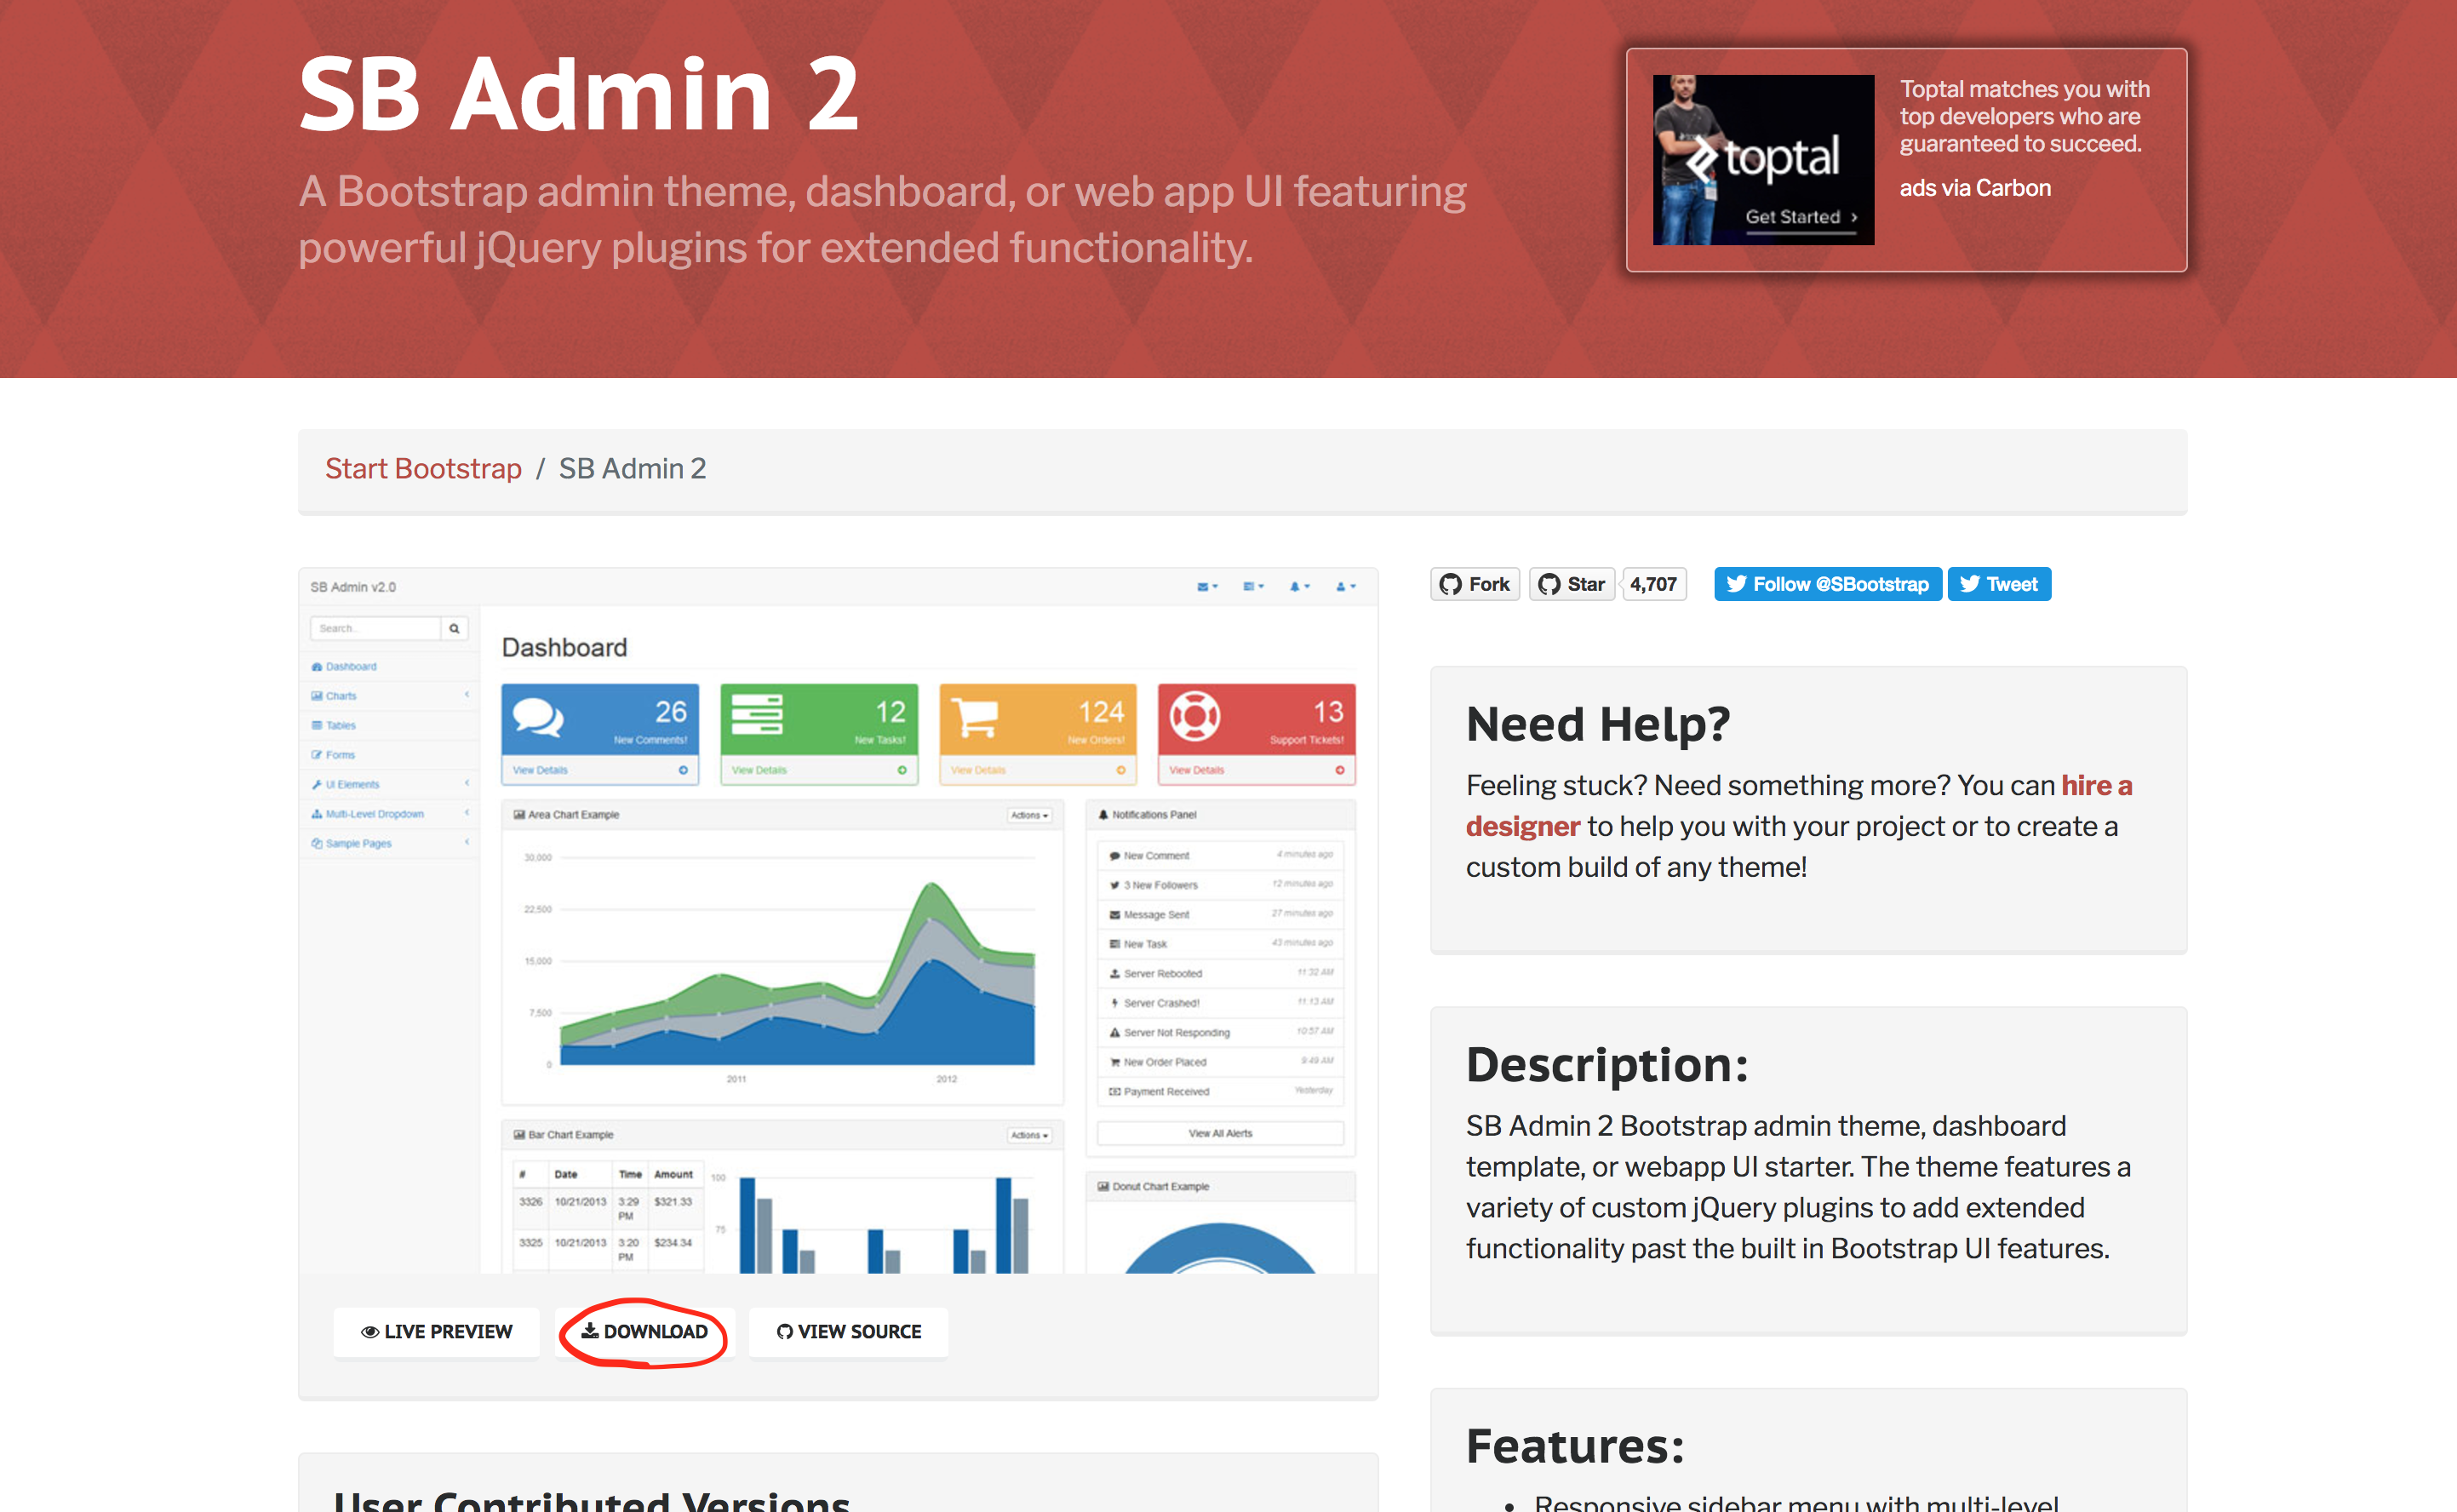

赤丸からダウンロードする。

Zipファイルを解凍して、中のファイルをそのまま、/static/bootstrap/配下に移動  
dist, js, vendorという名前のフォルダ以外は不要

###### 設定 

インストールしたファイルをHTMLから読み込む。

ページ毎にhead要素の中にlinkとかscriptとか書くのは面倒なので、共通となるhtmlファイルを作り、  
それを拡張してtemplateを作成する。

/manager/templates/の配下にbase.htmlを作る。

```
<!DOCTYPE html>
<html lang="ja">
  <head>
    {% load staticfiles %}
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <meta name="description" content="">
    <meta name="author" content="">

    <title>{% block title %}{% endblock %}</title>

    <link href="{% static 'bootstrap/vendor/bootstrap/css/bootstrap.min.css' %}" rel="stylesheet">
    <link href="{% static 'bootstrap/vendor/metisMenu/metisMenu.min.css' %}" rel="stylesheet">
    <link href="{% static 'bootstrap/dist/css/sb-admin-2.css' %}" rel="stylesheet">
    <link href="{% static 'bootstrap/vendor/font-awesome/css/font-awesome.min.css' %}" rel="stylesheet" type="text/css">

    <link href="{% static 'manager/css/structure.css' %}" rel="stylesheet" type="text/css">

    <script type="text/javascript" src="{% static 'bootstrap/vendor/jquery/jquery.min.js' %}"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jqueryui/1.11.0/jquery-ui.min.js"></script>

    <script src="{% static 'bootstrap/vendor/bootstrap/js/bootstrap.min.js' %}"></script>
    <script src="{% static 'bootstrap/vendor/metisMenu/metisMenu.min.js' %}"></script>
    <script src="{% static 'bootstrap/vendor/datatables/js/jquery.dataTables.min.js' %}"></script>
    <script src="{% static 'bootstrap/vendor/datatables-plugins/dataTables.bootstrap.min.js' %}"></script>
    <script src="{% static 'bootstrap/vendor/datatables-responsive/dataTables.responsive.js' %}"></script>
    <script src="{% static 'bootstrap/dist/js/sb-admin-2.js' %}"></script>

    <!-- HTML5 Shim and Respond.js IE8 support of HTML5 elements and media queries -->
    <!-- WARNING: Respond.js doesn't work if you view the page via file:// -->
    <!--[if lt IE 9]>
        <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
        <script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    <![endif]-->
  </head>
  <body>
    <div id="wrapper">
      <nav class="navbar navbar-default navbar-static-top manager-nav no-margin" role="navigation">
        <div class="navbar-header">
          <a class="navbar-brand">gragragrao Company</a>
        </div>
        <div class="navbar-default sidebar" role="navigation">
          <div class="sidebar-nav navbar-collapse">
            <ul class="nav" id="side-menu">
              <li><a href="/worker_list/"><i class="fa fa-bar-chart" aria-hidden="true"></i>  Worker一覧</a></li>
            </ul>
          </div>
        </div>
      </nav>
      {% block body %}
      {% endblock %}
    </div>
  </body>
</html>
```
これを拡張して worker_list.html を作る
```
{% extends "base.html" %}
{% block title %}Worker List{% endblock %}
{% load staticfiles %}

      {% block body %}
      <div id="wrapper">
        <div id="page-wrapper">
          <div class="row">
            <div class="col-lg-6 full-width margin-top-20percent" >
              <div class="panel panel-default full-width">

                <div class="panel-heading">
                  Edit Help
                </div>

                <div class="panel-body full-width full-height">
                  <table id="worker-list-table" class="table table-striped table-bordered table-hover dataTable no-footer dtr-inline full-width">
                    <thead>
                      <tr>
                        <th>ID</th>
                        <th>名前</th>
                        <th>性別</th>
                        <th>誕生日</th>
                        <th>manager_id</th>
                      </tr>
                    </thead>
                    <tbody>
                    {% for worker in workers %}
                      <tr>
                        <td>{{worker.id}}</td>
                        <td>{{worker.person.name}}</td>
                        <td>{{worker.person.sex}}</td>
                        <td>{{worker.person.birthday}}</td>
						<td>{{worker.manager.id}}
                      </tr>
                    {% endfor %}
                    </tbody>
                  </table>
                </div>

              </div>
            </div>
          </div>
        </div>
      </div>
      <script>
        $(document).ready(function() {
            $('#worker-list-table').DataTable({
                responsive: true,
                // sort機能の無効化
                ordering: false,
                // ページの表示件数を変更する
                displayLength: 20,
            });
        });
      </script>
      {% endblock %}
```


## 概要
### MTVモデルとは
DjangoはMTVモデルを採用している。

MTVとは、

- Model（データベースに格納されているデータ）
- Template（テンプレートファイルによって定義されたそれぞれのページのデザイン）
- View（どのページを表示させるかを決定する処理）

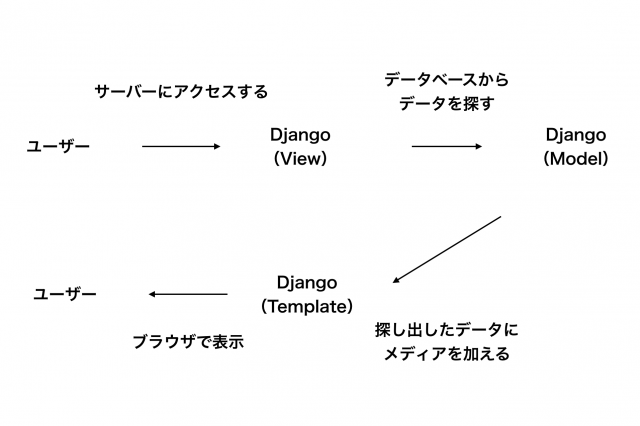</src>

## 概要

### リクエストからレスポンスまで
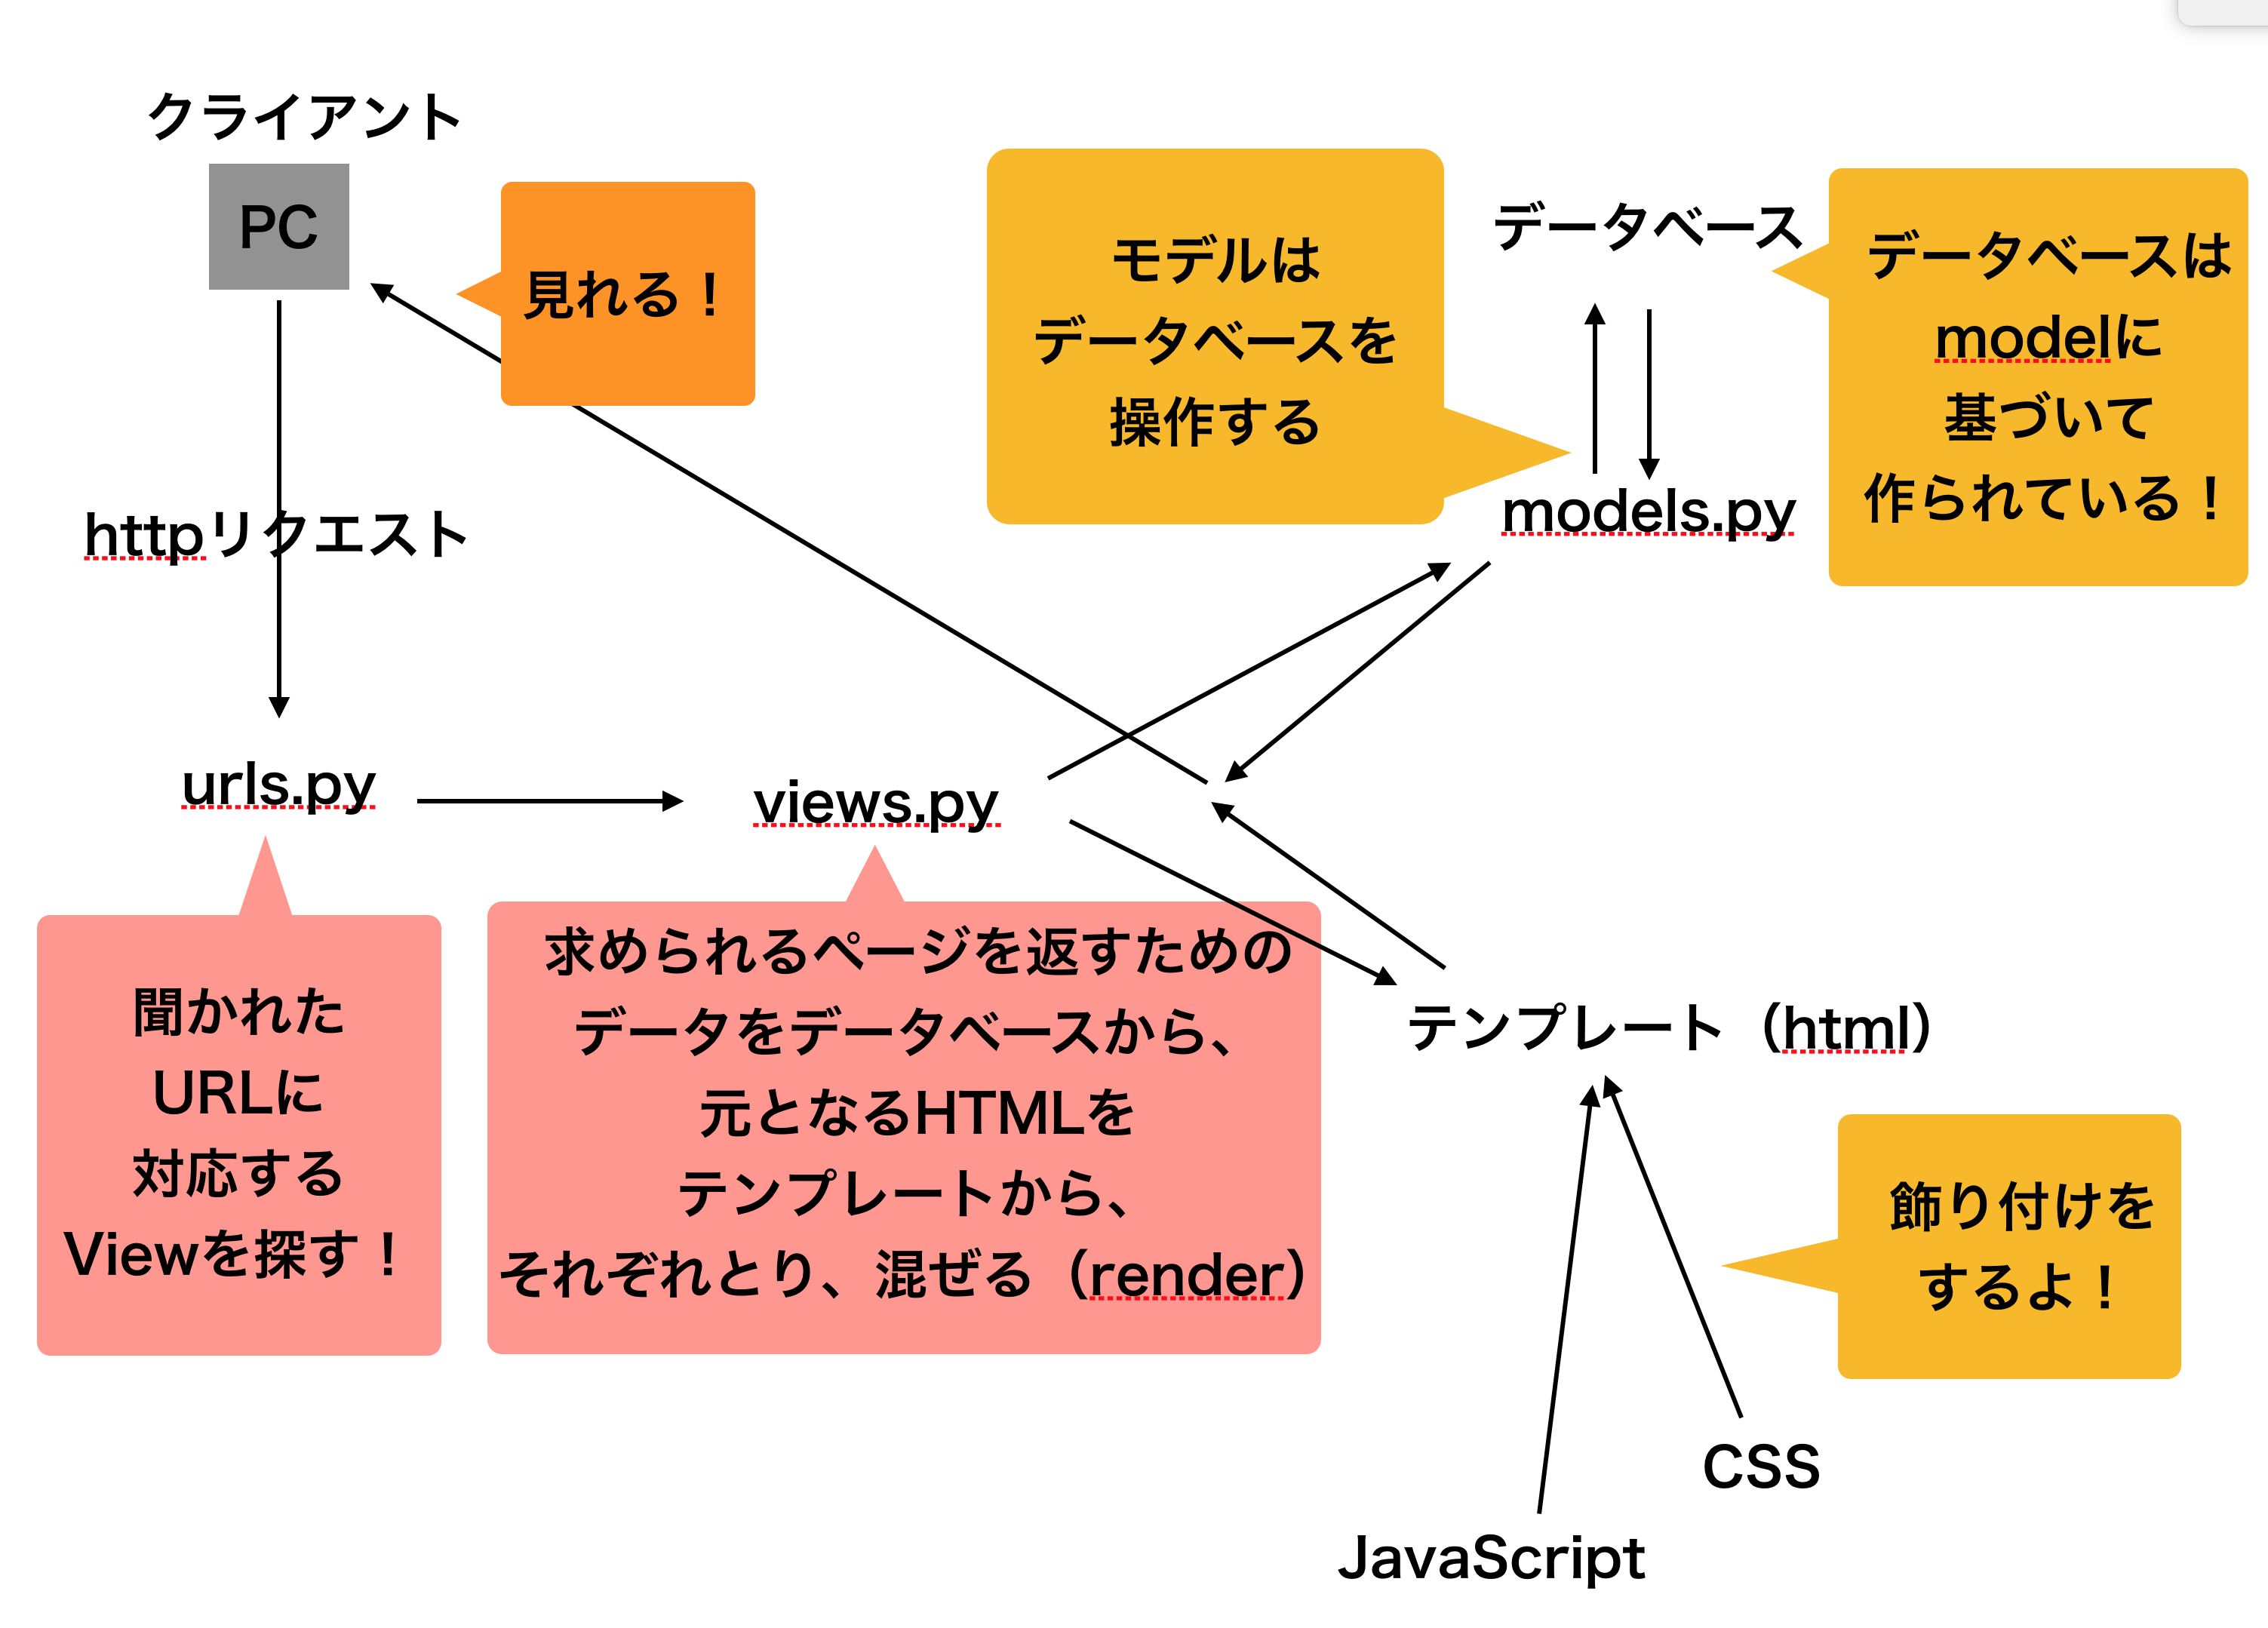</img>